In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
cds = gpd.read_file("data/congressional-districts.shp")

,OBJECTID,STATEFP,CD116FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,...,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19,GEOID_SHOR,PCT_BLACK,%_BLACK,geometry
0,1.0,27,07,2707,Congressional District 7,C2,116,G5200,N,8.658130e+10,...,1449.0,237.0,536.0,132.0,70.0,79.0,2707,None,1.581,"POLYGON ((-85755.403 1059392.760, -85755.223 1..."
1,2.0,27,02,2702,Congressional District 2,C2,116,G5200,N,6.314305e+09,...,3487.0,778.0,1496.0,374.0,11.0,17.0,2702,None,5.055,"POLYGON ((156041.356 538824.341, 156117.172 53..."
2,3.0,27,06,2706,Congressional District 6,C2,116,G5200,N,7.460443e+09,...,1662.0,354.0,972.0,291.0,83.0,64.0,2706,None,3.504,"POLYGON ((100179.586 635224.209, 100180.047 63..."
3,4.0,27,08,2708,Congressional District 8,C2,116,G5200,N,7.228214e+10,...,1068.0,209.0,816.0,177.0,66.0,40.0,2708,None,1.079,"POLYGON ((58107.849 875841.298, 59334.069 8758..."
4,5.0,17,01,1701,Congressional District 1,C2,116,G5200,N,6.691837e+08,...,3502.0,626.0,1309.0,611.0,327.0,224.0,1701,None,50.845,"POLYGON ((617402.230 193574.305, 617435.436 19..."


In [4]:
cds["PCT_BLACK"] = cds["B02001e3"] / cds["B02001e1"] * 100

<AxesSubplot:>

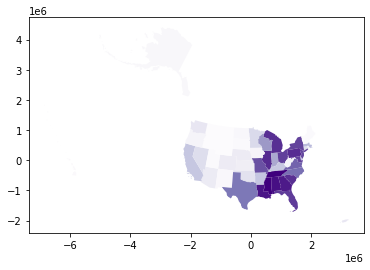

In [5]:
cds_by_state_highest_black = cds.dissolve(by="STATEFP", aggfunc={"PCT_BLACK": "max"}, as_index=False)
cds_by_state_highest_black.plot(column="PCT_BLACK", cmap="Purples")